# Introduction

Time series modeling is a hot topic in tech right now. Bridging the worlds of statistical modeling and machine learning, time series modeling allows one to model processes based on one thing: time. For the majority of the discipline's existence, stochastic models have dominated the methodology. Primarily, these include ARIMA and SARIMA models. While robust to many troublesome patterns found within your run of the mill time series, they can't solve everything. Parametric models, while accurate, always suffer from violated assumptions. One issue these models struggle with is non-constant variance, which was solved by Robert F. Engle's ARCH model $_{[1]}$. 

New innovations are still being made to solve the holes in these models. A 2017 research paper written by Hristos Tyralis and Georgia Papacharalampous $_{[2]}$ suggests that the use of random forest for endogenous variable selection in multivariate time series produces better forecasts than their univariate counterparts.

In this project, we examine the BCG Jena Weather Station Dataset from 2017-2024 $_{[3]}$. Utilizing the methodology of Tyralis and Papacharalampous, we investigate the effectiveness of random forest-engineered time series models on weather in comparison to other contemporary methods.

# Data Processing

In [6]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt

path = kagglehub.dataset_download("matthewjansen/bgc-jena-weather-station-dataset-20172024")
files = os.listdir(path)
csv_file = [file for file in files if file.endswith('.csv')]
dataset_path = os.path.join(path, csv_file[0])
df = pd.read_csv(dataset_path)
print(df)

                  Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  \
0       2017-01-01 00:10:00    999.77     -4.91    268.27        -8.41   
1       2017-01-01 00:20:00    999.63     -5.05    268.13        -8.37   
2       2017-01-01 00:30:00    999.54     -4.98    268.21        -8.38   
3       2017-01-01 00:40:00    999.40     -4.88    268.33        -8.56   
4       2017-01-01 00:50:00    999.17     -5.17    268.06        -8.74   
...                     ...       ...       ...       ...          ...   
420777  2024-12-31 23:20:00    997.74     -0.78    272.55        -2.64   
420778  2024-12-31 23:30:00    997.81     -1.42    271.90        -2.71   
420779  2024-12-31 23:40:00    997.88     -1.41    271.90        -2.80   
420780  2024-12-31 23:50:00    997.92     -1.63    271.68        -2.96   
420781  2025-01-01 00:00:00    997.51     -1.54    271.81        -3.00   

        rh (%)  VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  ...  \
0         76.3          4.24       

The BCG Jena Weather Station Dataset contains 22 measurements of weather related processes such as pressure, temperature, and namely, rainfall. For the sake of this project, we will be focussing on the rain measurements. In this particular dataset, rainfall is measured in 10 minute intervals. While informative, this scale doesn't present meaningful insights. Thus, we will convert the dataset to a day-by-day amount.

/var/folders/94/m6gj35yn3zddpm3bq3jz8w0h0000gn/T/ipykernel_8397/2196414821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain["datetime"] = pd.to_datetime(rain["Date Time"])


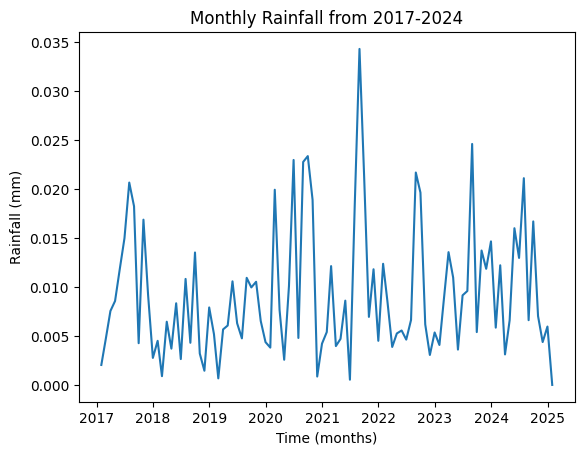

In [7]:
import pandas as pd

rain = df[["Date Time", "rain (mm)"]]
rain["datetime"] = pd.to_datetime(rain["Date Time"])
rain.set_index("datetime", inplace=True)
daily_means = rain["rain (mm)"].resample("ME").mean()

plt.plot(daily_means)
plt.xlabel("Time (months)")
plt.ylabel("Rainfall (mm)")
plt.title("Monthly Rainfall from 2017-2024")
plt.show()

# Feature Engineering

We will first proceed by creating endogenous variables for the random forest model.

In [13]:
hourly_means = rain["rain (mm)"].resample("h").mean()
daily_means = rain["rain (mm)"].resample("D").mean()
monthly_means = rain["rain (mm)"].resample("ME").mean()
yearly_means = rain["rain (mm)"].resample("YE").mean()

# References

1. Engle, R. F. (1982). Autoregressive conditional heteroscedasticity with estimates of the variance of United Kingdom inflation. Econometrica, 50(4), 987–1007. The Econometric Society. https://doi.org/10.2307/1912773.

2. Tyralis, H., & Papacharalampous, G. (2017). Variable Selection in Time Series Forecasting Using Random Forests. Algorithms, 10(4), 114. https://doi.org/10.3390/a10040114

3. Jansen, M. (2024). BGC Jena weather station dataset (2017–2024) [Dataset]. Kaggle. https://www.kaggle.com/datasets/matthewjansen/bgc-jena-weather-station-dataset-20172024.